In [1]:
import sys
import os
import numpy as np
sys.path.append("..")
from diachr import TadBoundarySet
from diachr import DiachromaticInteractionSet
from scipy import stats
import matplotlib.pyplot as plt
import random

In [80]:
#tad_boundaries = '../additional_files/javierre_2016/tad_regions_hg38/hglft_genome_TADs_MK_hg38.bed'
tad_boundaries = '../additional_files/javierre_2016/tad_regions_hg38/merged_tad_boundary_centers.bed'

tbs = TadBoundarySet(tad_boundaries)

#nearest_tad_pos = tbs.get_nearest_tad_boundary('chr1', 10600000)
#print(nearest_tad_pos)
#nearest_tad_dist = tbs.get_distance_to_nearest_tad_boundary('chr1', 10600000)
#print(nearest_tad_dist)

tad_boundary_pos_1 = 9951817 + 1
# 3 tad boundaries in between
tad_boundary_pos_2 = 10652443

num_of_spanned_boundaries = tbs.get_number_of_boundaries_spanned_by_region('chr1', tad_boundary_pos_1, tad_boundary_pos_2)
print(num_of_spanned_boundaries)
print(tbs.chr_dict['chr1'])

1077
3
[1715436, 1913561, 2047936, 2181061, 2413561, 2676686, 2702781, 2780957, 2808435, 2845935, 3439686, 3739686, 3928704, 4324315, 4369315, 4622440, 4671190, 5260252, 5478690, 5947440, 6686190, 6959940, 7646190, 7764940, 7962440, 8345565, 8489940, 8527441, 8894941, 8964316, 9111191, 9166191, 9496816, 9597442, 9729317, 9796817, 9859629, 9951817, 10178692, 10371192, 10492443, 10652443, 10923693, 11014318, 11237443, 11579943, 11652443, 11729943, 12043693, 12219943, 13831005, 13891005, 13963505, 14788504, 15034129, 15116004, 15161004, 15254754, 15308504, 15480067, 15526317, 15768505, 16045380, 16188505, 16554442, 16872255, 17056005, 17286005, 17413504, 17463504, 17542255, 17648505, 18236006, 18324131, 18469131, 18523506, 18573506, 18871006, 19063193, 19283193, 19716007, 19793507, 19866007, 20212257, 20291007, 20498507, 20659757, 20971007, 21212882, 21444132, 21486007, 21611007, 21666007, 21890382, 22006319, 22091007, 22143507, 22283507, 22383507, 22421007, 22556632, 22672257, 22951007, 

In [15]:
CELL_TYPE_SHORT = 'MAC_M0'
ANALYSIS='HT_RMRO_FDR001'
INTERACTION_FILE = '../DICer_interactions/' + ANALYSIS.upper() + '/CHC/JAV_' + CELL_TYPE_SHORT + '_RALT_20000_' + ANALYSIS.lower() + '_evaluated_and_categorized_interactions.tsv.gz'
RPC_RULE = "ht"
OUT_PREFIX = 'JAV_' + CELL_TYPE_SHORT + '_RALT_20000_' + ANALYSIS.lower()

In [11]:
tad_boundaries = '../additional_files/javierre_2016/tad_regions_hg38/hglft_genome_TADs_' + CELL_TYPE_SHORT + '_hg38.bed'
tad_boundaries = '../additional_files/javierre_2016/tad_regions_hg38/merged_tad_boundary_centers.bed'
tbs = TadBoundarySet(tad_boundaries)

In [16]:
# Create an DiachromaticInteractionSet object
d11_interaction_set = DiachromaticInteractionSet(rpc_rule = RPC_RULE)
d11_interaction_set.parse_file(
    i_file = INTERACTION_FILE,
    verbose = True)

report_dict = d11_interaction_set.select_reference_interactions_2x(verbose=True)

[INFO] Parsing Diachromatic interaction file ...
	[INFO] ../DICer_interactions/HT_RMRO_FDR001/CHC/JAV_MAC_M0_RALT_20000_ht_rmro_fdr001_evaluated_and_categorized_interactions.tsv.gz
	[INFO] Parsed 1,000,000 interaction lines ...
	[INFO] Parsed 2,000,000 interaction lines ...
	[INFO] Parsed 3,000,000 interaction lines ...
	[INFO] Set size: 3,845,696
[INFO] ... done.
[INFO] Select reference interactions ...
	[INFO] Treating NE and EN as one category ...
	[INFO] First pass: Count directed interactions for different read pair counts ...
	[INFO] Second pass: Select undirected reference interactions for different read pair counts ...
	[INFO] Third pass: Mark directed interactions for which there is no reference ...
[INFO] ... done.


In [17]:
tad_dist_lists = {
    'DIX': [],
    'DI': [],
    'UIR': [],
    'UI': [],
    'ALL': [],
    'RANDOM': []
}
for d11_inter in d11_interaction_set._inter_dict.values():
    if d11_inter.enrichment_status_tag_pair == 'NE':
        dist = tbs.get_distance_to_nearest_tad_boundary(d11_inter.chrA, d11_inter.fromA)
    if d11_inter.enrichment_status_tag_pair == 'EN':
        dist = tbs.get_distance_to_nearest_tad_boundary(d11_inter.chrA, d11_inter.toB)
            
    tad_dist_lists[d11_inter.get_category()].append(dist)
    tad_dist_lists['ALL'].append(dist)
    
    # Draw random position from region that is spanned by this interction and determine distance to nearest tad
    random_position = random.randint(d11_inter.fromA, d11_inter.toB)
    random_dist = tbs.get_distance_to_nearest_tad_boundary(d11_inter.chrA, random_position)
    tad_dist_lists['RANDOM'].append(random_dist)
print('... done.')

... done.


In [18]:
print(OUT_PREFIX)
print()
for i_cat in ['DIX','DI','UIR','UI', 'ALL', 'RANDOM']:
    print(i_cat + ' -----------')
    print('\tQuantiles: ' + str(np.quantile(tad_dist_lists[i_cat], [0.25, 0.50, 0.75])))
    print('\tn=' + str(len(tad_dist_lists[i_cat])))

print()
print('DIX vs. DI: ' + str(stats.ks_2samp(tad_dist_lists['DIX'], tad_dist_lists['DI'])))
print('DI vs. UIR: ' + str(stats.ks_2samp(tad_dist_lists['DI'], tad_dist_lists['UIR'])))
print('UIR vs. UI: ' + str(stats.ks_2samp(tad_dist_lists['UIR'], tad_dist_lists['UI'])))
print('UI vs. RANDOM: ' + str(stats.ks_2samp(tad_dist_lists['UI'], tad_dist_lists['RANDOM'])))
print('ALL vs. RANDOM: ' + str(stats.ks_2samp(tad_dist_lists['ALL'], tad_dist_lists['RANDOM'])))
print()

JAV_MAC_M0_RALT_20000_ht_rmro_fdr001

DIX -----------
	Quantiles: [ 25620.  58796. 110492.]
	n=258598
DI -----------
	Quantiles: [ 25205.   58886.  114647.5]
	n=689527
UIR -----------
	Quantiles: [ 25669.   60140.  117572.5]
	n=689527
UI -----------
	Quantiles: [ 27275.  62961. 120789.]
	n=2208044
ALL -----------
	Quantiles: [ 26491.  61439. 118334.]
	n=3845696
RANDOM -----------
	Quantiles: [ 25852.  63387. 123215.]
	n=3845696

DIX vs. DI: KstestResult(statistic=0.017748073056713776, pvalue=6.877286831057825e-52)
DI vs. UIR: KstestResult(statistic=0.010131582954692075, pvalue=3.6169107528855255e-31)
UIR vs. UI: KstestResult(statistic=0.017785201602483258, pvalue=8.366300609981348e-145)
UI vs. RANDOM: KstestResult(statistic=0.01427308077934969, pvalue=1.2386794898256592e-248)
ALL vs. RANDOM: KstestResult(statistic=0.015344686631496685, pvalue=0.0)



[Text(1, 0, 'DIX'),
 Text(2, 0, 'DI'),
 Text(3, 0, 'UIR'),
 Text(4, 0, 'UI'),
 Text(5, 0, 'ALL'),
 Text(6, 0, 'RANDOM')]

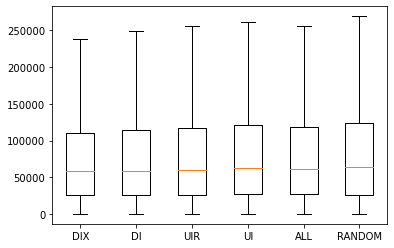

In [19]:
fig, ax = plt.subplots()
ax.boxplot(tad_dist_lists.values(),showfliers=False)
ax.set_xticklabels(tad_dist_lists.keys())